In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

# Load the MNIST dataset

In [6]:
from sklearn import datasets, preprocessing

mnist = datasets.fetch_mldata('MNIST original')
X, y = mnist.data.astype(float), mnist.target.astype(int)

print("Original Shape")
print(X.shape, y.shape)

# Reshape the original dataset which is flat to 28x28 images
X = X.reshape(len(X), 28, 28)

print("\nNew Shape")
print(X.shape)
X.shape

Original Shape
(70000, 784) (70000,)

New Shape
(70000, 28, 28)


(70000, 28, 28)

In [8]:
# Height and width of our new synthethic images
height, width = 48, 152
# Maximum/Minmum number of digits
max_digits = 11
min_digits = 10
mob_digits = 11
# Scale the origina images down to 45% (12x12 pixels)
scale = 0.45
# New height and width of the scaled images
new_height, new_width = 12, 12
# We create a new dataset with 50,000 images
dataset_size = 50000


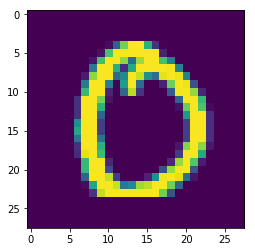

In [9]:
# display a single image
def plot_image(img):
    plt.imshow(img, interpolation='nearest')

# display digits
def plot_images(img, labels, nrows, ncols):
    
    plt.figure(figsize=(min(16, ncols*2), min(16, nrows*2)))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i+1)
        # Reshape every image to a square array 2d array
        if img[i].shape == (height, width, 1):
            plt.imshow(img[i,:,:,0], interpolation='nearest')
        else:
            plt.imshow(img[i], interpolation='nearest')
        plt.xticks([]); plt.yticks([])
        plt.title(labels[i])
        
plot_image(X[11])

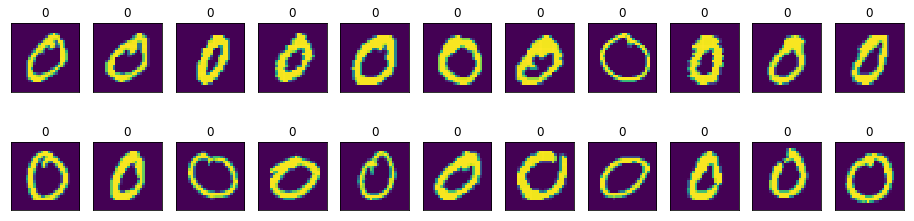

In [10]:
plot_images(X, y, 2, 11)

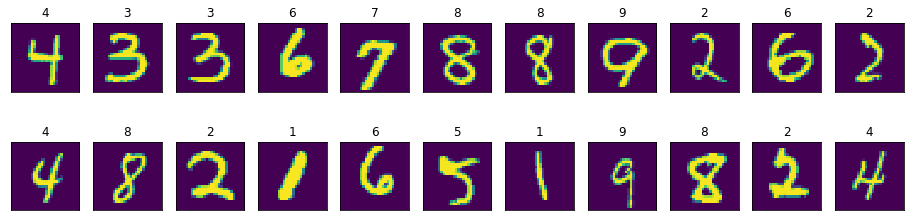

In [11]:
from sklearn.utils import shuffle

# Shuffle the dataset
X, y = shuffle(X, y)

plot_images(X, y, 2, 11)

# Concatenate the images and labels

/Users/simon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


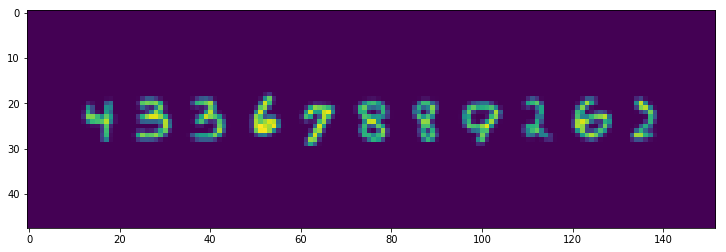

In [12]:
from scipy.misc import imresize

#concatenates and centers a sequence of digits
def concat_images(images):
    
    num_digits = len(images)    
    new_image = np.zeros(shape=(height, width), dtype="uint8")
    
    # Calculate the horizontal and vertical padding
    y_pad = (height - new_height) // 2
    x_pad = (width - num_digits * new_width) // 2
    
    # For every image passed to the function
    for i in range(num_digits):                        
        # Scale down the original image
        scaled = imresize(images[i], scale)
        
        # Calculate the starting position
        x_offset = x_pad + (i*new_width)
        
        # Add the scaled image to the new image
        new_image[y_pad:height-y_pad, x_offset:x_offset+new_width] = scaled

    return new_image

# Concatenate image 0 through 11 to a single image
plot_image(concat_images(X[0:11]))

In [18]:
#Concatenates a set of set of labels into a single numpy array
def concat_labels(labels, num_images=max_digits):
    new_label = np.zeros(num_images, dtype=int)
    for i in range(num_images):
        if i < len(labels):
            new_label[i] = labels[i]
        else:
            new_label[i] = 10
    return new_label

concat_labels(y[:11])

array([4, 3, 3, 6, 7, 8, 8, 9, 2, 6, 2])

/Users/simon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


array([4, 3, 3, 6, 7, 8, 8, 9, 2, 6, 2])

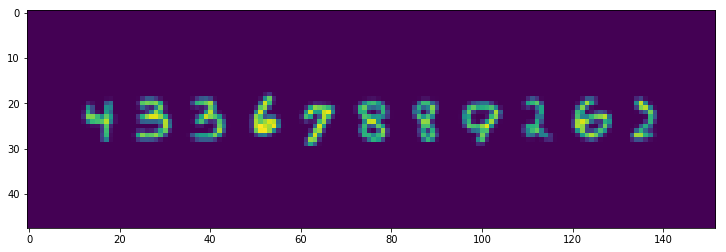

In [19]:
plot_image(concat_images(X[:11]))
concat_labels(y[:11])

# Mobile number dataset generator

In [20]:
import random

# automatically generating a new dataset of digit sequences
def generate_digit_sequences(data, labels, n):

    X = np.zeros(shape=(n, height, width), dtype='uint8')
    y = np.zeros(shape=(n, max_digits), dtype=np.int32)
    
    n_samples = n // max_digits
    
    # For every possible digit sequence length
    for i in range(0, max_digits+1):        
        # Pick n_samples images
        for j in range((i-1)*n_samples, i*n_samples):            
            # Select random mobile digits from the original dataset
            selection = random.sample(range(0, len(data)),mob_digits)
            
            # Concatenate the digits and labels from
            X[j] = concat_images(data[selection])
            y[j] = concat_labels(labels[selection])

    X = np.expand_dims(X, axis=3)

    return X, y

# Generate a synthetic dataset of digit sequences with new images
X_new, y_new = generate_digit_sequences(X, y, dataset_size)

print("Images", X_new.shape)
print("Labels", y_new.shape)

/Users/simon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


Images (50000, 48, 152, 1)
Labels (50000, 11)


# Check the class balance and sequence lengths

Text(0.5,1,'Sequence Length Distribution')

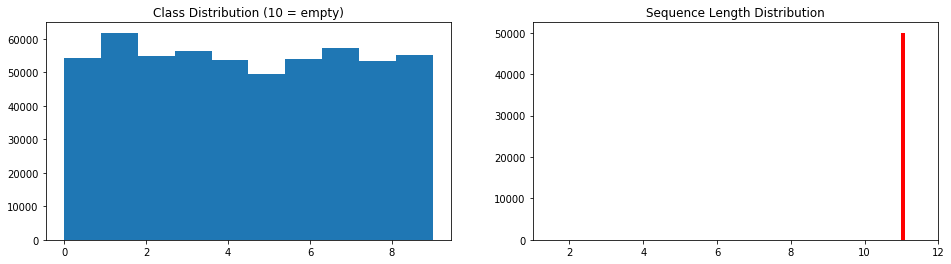

In [21]:
# Plot a histogram showing the class distribution
plt.subplot2grid((1, 2), (0, 0))
plt.hist(y_new.flatten())
plt.title("Class Distribution (10 = empty)")

# Plot a histogram showing the sequence length distribution
plt.subplot2grid((1, 2), (0, 1))
plt.hist((y_new != 10).sum(1), color='r', bins=12)
plt.xlim(1, 12)
plt.title("Sequence Length Distribution")

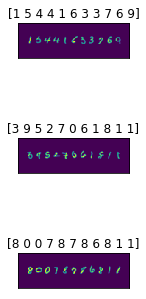

In [28]:
# Shuffle dataset
X_new, y_new = shuffle(X_new, y_new, random_state=0)

plot_images(X_new, y_new, 3, 1)

# Training, Test and Validation mobile number Sets

In [24]:
from sklearn.cross_validation import train_test_split

# Create a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new)

# Select some random images to be used in validation set
idx = np.random.choice(range(0, len(X_test)), size=int(len(X_test)*0.20), replace=False)

# Construct validation set and remove the images from the test set
X_val, y_val = X_test[idx], y_test[idx]

# Remove the validation samples from the testset
X_test = np.delete(X_test, idx, axis=0)
y_test = np.delete(y_test, idx, axis=0)

print("Training", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)
print('Validation', X_val.shape, y_val.shape)

Training (37500, 48, 152, 1) (37500, 11)
Test (10000, 48, 152, 1) (10000, 11)
Validation (2500, 48, 152, 1) (2500, 11)


# Store the Mobile Number Data

In [25]:
import h5py

# Create file
h5f = h5py.File('data/MNIST_synthetic.h5', 'w')

# Store the datasets
h5f.create_dataset('train_dataset', data=X_train)
h5f.create_dataset('train_labels', data=y_train)
h5f.create_dataset('test_dataset', data=X_test)
h5f.create_dataset('test_labels', data=y_test)
h5f.create_dataset('valid_dataset', data=X_val)
h5f.create_dataset('valid_labels', data=y_val)

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

h5f.close()

Training set (37500, 48, 152, 1) (37500, 11)
Validation set (2500, 48, 152, 1) (2500, 11)
Test set (10000, 48, 152, 1) (10000, 11)


In [29]:
from __future__ import print_function
import numpy as np

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

In [30]:
valid_imshow_data(X_new)

To visualize an image the data must be 2 dimensional or 3 dimensional, not "4".


False

# Load the Mobile Number Data

In [31]:
import h5py
h5f = h5py.File('./data/MNIST_synthetic.h5','r')

X_train = h5f['train_dataset'][:]
y_train = h5f['train_labels'][:]
X_val = h5f['valid_dataset'][:]
y_val = h5f['valid_labels'][:]
X_test = h5f['test_dataset'][:]
y_test = h5f['test_labels'][:]

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

h5f.close()

Training set (37500, 48, 152, 1) (37500, 11)
Validation set (2500, 48, 152, 1) (2500, 11)
Test set (10000, 48, 152, 1) (10000, 11)


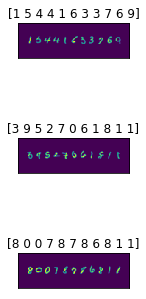

In [33]:
plot_images(X_new, y_new, 3, 1)

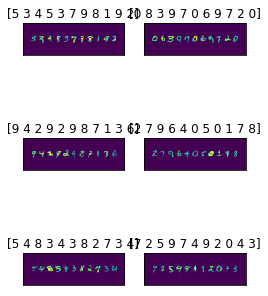

In [38]:
plot_images(X_train,y_train,3,2)